# Atelier 2 «Classification»

# Partie 1 (Data Visualisation et Feature Selection et Normalisation):

1. En utilisant pandas essayer d’explorer les données du Data set.

In [1]:
import pandas as pd

In [2]:
# avoid warnings 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
columns=["Preg","Glucose","Pres","Skin","Insulin","BMI","Pedi","Age","Outcome"]
df=pd.read_csv("pima-indians-diabetes.csv", names=columns)
df.head()

,Preg,Glucose,Pres,Skin,Insulin,BMI,Pedi,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. Afficher le résumer statistique du Data Sets avec une interprétation des résultats obtenues.

In [4]:
df.describe()

,Preg,Glucose,Pres,Skin,Insulin,BMI,Pedi,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Interprétation :
- count : le nombre d’enregistrement dans la Data sets.
- mean : la moyenne de chaque colonne.
- std : l’écart-type de chaque colonne.
- min : la valeur minimale de chaque colonne.
- 25% et 75% : les interquartiles de chaque colonne.
- max : la valeur maximale de chaque colonne.

3. Afficher les nuages des points du data set selon les propriétés « Features » en utilisant matplotlib et
pandas « scatter_matrix ».

In [5]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


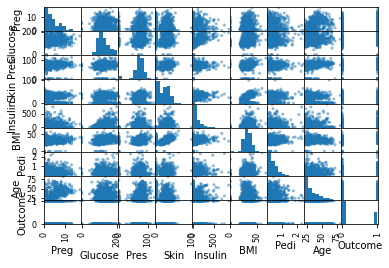

In [6]:
scatter_matrix(df)
plt.show()

4. Appliquer les 4 méthodes de Features selection « Univariate Selection, PCA, Recursive Feature
Elimination et Feature Importance ».

# Univariate Selection

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

In [8]:
array = df.values
X = array[:,0:8]
Y = array[:,8]

In [9]:
# feature extraction
test = SelectKBest(score_func=chi2, k=2)
fit = test.fit(X, Y)

In [10]:
# summarize scores
np.set_printoptions(precision=3)
col = ["Preg","Glucose","Pres","Skin","Insulin","BMI","Pedi","Age","Outcome"]
print(columns)
print(fit.scores_)

features = fit.transform(X)

# summarize selected features
#print(features[:,:])

['Preg', 'Glucose', 'Pres', 'Skin', 'Insulin', 'BMI', 'Pedi', 'Age', 'Outcome']
[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]


# Principal Component Analysis,PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=3)
fit = pca.fit(X)

# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


# Recursive Feature Elimination, RFE

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, Y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 5 6 1 1 3]


# Feature Importance, FI

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.109 0.23  0.095 0.081 0.075 0.146 0.119 0.145]


5. Normaliser les données des attributs qui nécessitent une normalisation.

In [18]:
#MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(df))

MinMaxScaler()


In [19]:
MinMaxScaler(copy=True, feature_range=(0, 1))
print(scaler.data_max_)

[ 17.   199.   122.    99.   846.    67.1    2.42  81.     1.  ]


In [20]:
print(scaler.transform(df))

[[0.353 0.744 0.59  ... 0.234 0.483 1.   ]
 [0.059 0.427 0.541 ... 0.117 0.167 0.   ]
 [0.471 0.92  0.525 ... 0.254 0.183 1.   ]
 ...
 [0.294 0.608 0.59  ... 0.071 0.15  0.   ]
 [0.059 0.633 0.492 ... 0.116 0.433 1.   ]
 [0.059 0.467 0.574 ... 0.101 0.033 0.   ]]


In [21]:
# RobustScaler
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(X)
print(transformer)
RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
with_scaling=True)
print(transformer.transform(X))

RobustScaler()
[[ 0.6    0.752  0.    ...  0.172  0.665  1.235]
 [-0.4   -0.776 -0.333 ... -0.581 -0.056  0.118]
 [ 1.     1.6   -0.444 ... -0.935  0.783  0.176]
 ...
 [ 0.4    0.097  0.    ... -0.624 -0.333  0.059]
 [-0.4    0.218 -0.667 ... -0.204 -0.061  1.059]
 [-0.4   -0.582 -0.111 ... -0.172 -0.15  -0.353]]


In [22]:
#StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(df))
print(scaler.mean_)
print(scaler.transform(df))

StandardScaler()
[  3.845 120.895  69.105  20.536  79.799  31.993   0.472  33.241   0.349]
[[ 0.64   0.848  0.15  ...  0.468  1.426  1.366]
 [-0.845 -1.123 -0.161 ... -0.365 -0.191 -0.732]
 [ 1.234  1.944 -0.264 ...  0.604 -0.106  1.366]
 ...
 [ 0.343  0.003  0.15  ... -0.685 -0.276 -0.732]
 [-0.845  0.16  -0.471 ... -0.371  1.171  1.366]
 [-0.845 -0.873  0.046 ... -0.474 -0.871 -0.732]]


# Partie 2 (Classification choix de algorithme adéquat ):  

1. En utilisant l’API sklearn entraîner les modèles en utilisant ces algorithmes « KNN, Decision Tree, ANN,
Naive Bayes, SVM selon les kernels suivants : Linear, polynomial et guassain».

# KNN

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

Text(0, 0.5, 'Accuracy')

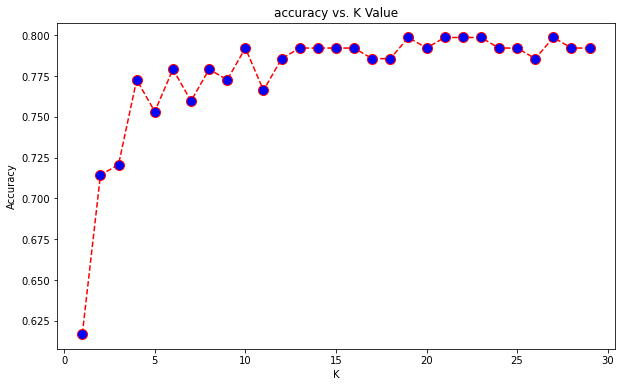

In [27]:
#how to choice the K (I tried many values and I found that 14 is the best -> acc=79,22%)
acc = []
from sklearn import metrics
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test) 
    acc.append(metrics.accuracy_score(Y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),acc,color = 'red',linestyle='dashed',marker='o',markerfacecolor='blue', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')  

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

# ANN

In [29]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, alpha=1e-4,solver='adam', random_state=0, learning_rate_init=0.001)
ann.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=0)

# Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

# Linear SVM

In [31]:
from sklearn.svm import LinearSVC

lsvm = LinearSVC()
lsvm.fit(X_train, Y_train)

LinearSVC()

# polynomial SVM  

In [32]:
from sklearn.svm import SVC

psvm = SVC(kernel='poly', degree=3)
psvm.fit(X_train, Y_train)

SVC(kernel='poly')

# gaussian SVM 

In [33]:
gsvm = SVC(kernel='rbf')
gsvm.fit(X_train, Y_train)

SVC()

2. Sauvegarder les 7 modèles

In [34]:
from joblib import dump, load

# Sauvegarde les modèles
dump(knn, 'knn.joblib')
dump(clf, 'clf.joblib')
dump(ann, 'ann.joblib')
dump(nb, 'nb.joblib')
dump(lsvm, 'lsvm.joblib')
dump(psvm, 'psvm.joblib')
dump(gsvm, 'gsvm.joblib')

['gsvm.joblib']

3. Charger les 7 modèles puis Prédire les données du data set de test, en utilisant les 7 modèles.

In [36]:
# Chargement des modèles
knn = load('knn.joblib')
clf = load('clf.joblib')
ann = load('ann.joblib')
nb = load('nb.joblib')
lsvm = load('lsvm.joblib')
psvm = load('psvm.joblib')
gsvm = load('gsvm.joblib')

In [41]:
print("_________________________KNN Prediction_______________________________")
knn_pred=knn.predict(X_test)
print(knn_pred)
print("_________________________DT Prediction_______________________________")
clf_pred=clf.predict(X_test)
print(clf_pred)
print("_________________________ANN Prediction_______________________________")
ann_pred=ann.predict(X_test)
print(ann_pred)
print("_________________________NB Prediction_______________________________")
nb_pred=nb.predict(X_test)
print(nb_pred)
print("_________________________LSVM Prediction_______________________________")
lsvm_pred=lsvm.predict(X_test)
print(lsvm_pred)
print("_________________________PSVM Prediction_______________________________")
psvm_pred=psvm.predict(X_test)
print(psvm_pred)
print("_________________________GSVM Prediction_______________________________")
gsvm_pred=gsvm.predict(X_test)
print(gsvm_pred)

_________________________KNN Prediction_______________________________
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
_________________________DT Prediction_______________________________
[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1.

3. Évaluer les modèles en utilisant ces métriques:

Classification Accuracy.
Logarithmic Loss.
Area Under ROC Curve.
Confusion Matrix.
Classification Report.

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, roc_auc_score

In [47]:
print("KNN :")
print("Accuracy :",metrics.accuracy_score(Y_test, knn_pred)*100)
print("confusion_matrix : \n",  confusion_matrix(Y_test, knn_pred))
print("classification_report : \n", classification_report(Y_test, knn_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, knn_pred))
print("Logarithmic Loss:", log_loss(Y_test, knn_pred))

print("--------------------------------------------------------------------")
print("DT :")
print("Accuracy :",metrics.accuracy_score(Y_test, clf_pred)*100)
print("confusion_matrix : \n",  confusion_matrix(Y_test, clf_pred))
print("classification_report : \n", classification_report(Y_test, clf_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, clf_pred))
print("Logarithmic Loss:", log_loss(Y_test, clf_pred))

print("--------------------------------------------------------------------")
print("ANN :")
print("Accuracy :",metrics.accuracy_score(Y_test, ann_pred)*100)
print("confusion_matrix : \n",  confusion_matrix(Y_test, ann_pred))
print("classification_report : \n", classification_report(Y_test, ann_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, ann_pred))
print("Logarithmic Loss:", log_loss(Y_test, ann_pred))

print("--------------------------------------------------------------------")
print("NB :")
print("Accuracy :",metrics.accuracy_score(Y_test, nb_pred)*100)
print("confusion_matrix : \n",  confusion_matrix(Y_test, nb_pred))
print("classification_report : \n", classification_report(Y_test, nb_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, nb_pred))
print("Logarithmic Loss:", log_loss(Y_test, nb_pred))

print("--------------------------------------------------------------------")
print("SVM Lieaire : ")
print("Accuracy :",metrics.accuracy_score(Y_test, lsvm_pred)*100)
print("confusion_matrix : \n",  confusion_matrix(Y_test, lsvm_pred))
print("classification_report : \n", classification_report(Y_test, lsvm_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, lsvm_pred))
print("Logarithmic Loss:", log_loss(Y_test, lsvm_pred))

print("--------------------------------------------------------------------")
print("SVM polynomial :")
print("Accuracy : \n",metrics.accuracy_score(Y_test, psvm_pred)*100)
print("confusion_matrix : \n",  confusion_matrix(Y_test, psvm_pred))
print("classification_report : \n", classification_report(Y_test, psvm_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, psvm_pred))
print("Logarithmic Loss:", log_loss(Y_test, psvm_pred))

print("-------------------------------------------------------------------")
print("SVM gaussian :")
print("Accuracy :",metrics.accuracy_score(Y_test, gsvm_pred)*100)
print("confusion_matrix : \n",  confusion_matrix(Y_test, gsvm_pred))
print("classification_report : \n", classification_report(Y_test, gsvm_pred))
print("ROC AUC Score:", roc_auc_score(Y_test, gsvm_pred))
print("Logarithmic Loss:", log_loss(Y_test, gsvm_pred))


KNN :
Accuracy : 79.22077922077922
confusion_matrix : 
 [[96 11]
 [21 26]]
classification_report : 
               precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       107
         1.0       0.70      0.55      0.62        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154

ROC AUC Score: 0.7251938755219726
Logarithmic Loss: 7.176945715642038
--------------------------------------------------------------------
DT :
Accuracy : 76.62337662337663
confusion_matrix : 
 [[87 20]
 [16 31]]
classification_report : 
               precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       107
         1.0       0.61      0.66      0.63        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.77      0.77       154

ROC AU

4. Comparer la performance des 8 algorithmes en utilisant la technique Spot-checking.

On peut bien remarquer que l’ordre décroissant de la performance des 7 algorithmes (du plus
performant au moins performant) est :

Naive Bayes (79.22%)

KNN (79.22%)

Polynomial SVM (79.22%)

Gaussian SVM (79.22%)

Décision Tree(76.6%) 

ANN (66.8%)

Linear SVM (64.9%)

5. Appliquer cette fois les trois techniques d’ensemble learning « bagging , stacking et boosting »

In [63]:
#stacking
from sklearn.ensemble import StackingClassifier
models=[knn,clf,nb,ann,lsvm,psvm,gsvm ]
sclf = StackingClassifier(estimators=models ,final_estimator=LogisticRegression())

for cl in models:
    cl.fit(X_train, Y_train)
    
for cl in models:
    print(cl.__class__.__name__)
    print("Accuracy: %0.2f" % cl.score(X_test, Y_test))

KNeighborsClassifier
Accuracy: 0.79
SVC
Accuracy: 0.79
GaussianNB
Accuracy: 0.79
MLPClassifier
Accuracy: 0.67
LinearSVC
Accuracy: 0.71
SVC
Accuracy: 0.79
SVC
Accuracy: 0.79


In [64]:
#bagging
from sklearn.ensemble import BaggingClassifier
models=[knn,clf,nb,ann,lsvm,psvm,gsvm ]
bag_cls = BaggingClassifier(base_estimator=models, n_estimators=10, random_state=42)

for bag_clf in models:
    bag_clf.fit(X_train, Y_train)
    
for bag_clf in models:
    print(bag_clf.__class__.__name__)
    print("Accuracy: %0.2f" % bag_clf.score(X_test, Y_test))

KNeighborsClassifier
Accuracy: 0.79
SVC
Accuracy: 0.79
GaussianNB
Accuracy: 0.79
MLPClassifier
Accuracy: 0.67
LinearSVC
Accuracy: 0.69
SVC
Accuracy: 0.79
SVC
Accuracy: 0.79


6. Comparer les résultats obtenues des trois techniques avec les résultats de 7 algorithmes.

Les résultats obtenus par les trois techniques et les 7 algorithmes sont proches